In [23]:
import pandas as pd

In [24]:
df=pd.read_csv('shopping-data .csv')

In [25]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [27]:
df['Genre']=l.fit_transform(df['Genre'])

In [28]:
df.shape

(200, 5)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


In [30]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage



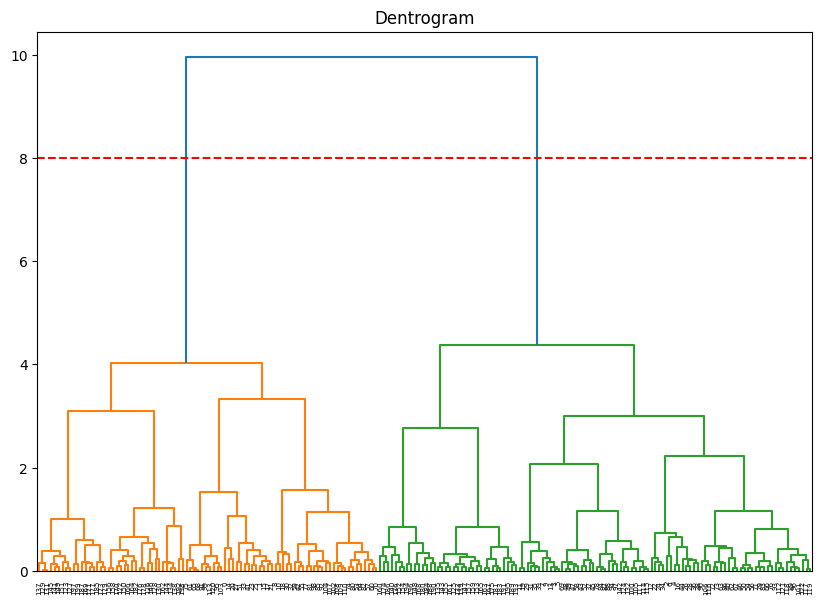

In [31]:
plt.figure(figsize=(10,7))
plt.title('Dentrogram')
dend=dendrogram(linkage(df_scaled,method='ward'))
plt.axhline(y=8,color='r',linestyle='--')

In [32]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [33]:
clusters=model.fit_predict(df_scaled)
clusters

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

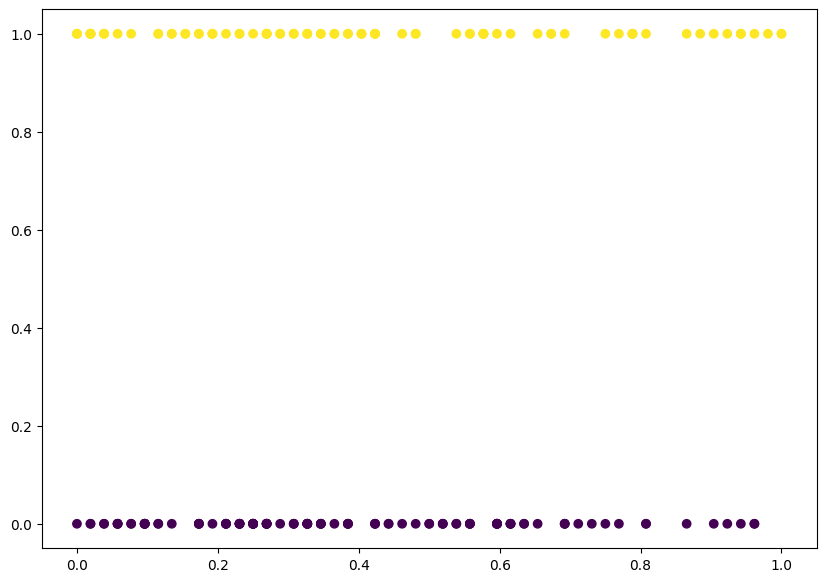

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(df_scaled['Age'],df_scaled['Genre'],c=clusters)